In [47]:
import snscrape.modules.twitter as snt
import pandas as pd
import re
import emoji
from datetime import date, datetime
from collections import Counter
import nltk
import numpy as np

In [48]:
#Reading twitter dataset file for preprocessing

final=pd.read_csv("final.csv")
print(final.head(5))

   Unnamed: 0                                                url   
0           0  https://twitter.com/gand_oliver/status/1648233...  \
1           1  https://twitter.com/MirrorF1/status/1648233870...   
2           2  https://twitter.com/MotorsportWeek/status/1648...   
3           3  https://twitter.com/f1reader/status/1648233423...   
4           4  https://twitter.com/Racingnews365C/status/1648...   

                        date            id   
0  2023-04-18 07:56:10+00:00  1.650000e+18  \
1  2023-04-18 07:55:52+00:00  1.650000e+18   
2  2023-04-18 07:54:56+00:00  1.650000e+18   
3  2023-04-18 07:54:05+00:00  1.650000e+18   
4  2023-04-18 07:53:56+00:00  1.650000e+18   

                                                user  replyCount   
0  {'username': 'gand_oliver', 'id': 753267774017...           0  \
1  {'username': 'MirrorF1', 'id': 113622858, 'dis...           2   
2  {'username': 'MotorsportWeek', 'id': 27343080,...           0   
3  {'username': 'f1reader', 'id': 23044052

In [49]:
#replacing "" with NA in retweetedTweets and quotedTweets columns
final.fillna({"retweetedTweet": "NA", "quotedTweet": "NA"}, inplace=True)

In [50]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

TwtwithoutAT=[]
sentimentScore=[]
lemm_tokens=[]
tfidf_matrices=[]
for tweets in final[['renderedContent'][0]]:
    #removing @
    tweets = re.sub("@+","",tweets) #@[A-Za-z0-9]+
    #removing hyperlinks
    tweets = re.sub("(?:\\@|http?\\://|https?\\://|www)\\S+","",tweets)
    #replacing # and _
    tweets = tweets.replace("#", "").replace("_", " ")
    #removing/replacing emojis
    tweets = emoji.replace_emoji(tweets,"")
    #removing spaces from start and end
    tweets = re.sub(r'\n','', tweets).strip()
    # Replace Unicode characters in the 'tweets' variable
    tweets = tweets.replace("\u2019", "'")
    tweets = tweets.replace("\u2018", "'")
    tweets = tweets.replace("\u2026", "...")
    tweets = tweets.replace("\u2013", "-")
    tweets = tweets.replace("\u201c", "\"")
    tweets = tweets.replace("\u201d", "\"")

    text = tweets

  # Tokenization
    tokens = word_tokenize(text)

  # Stop words removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

    # TF-IDF
    documents = [" ".join(lemmatized_tokens)]  # Creating a single document for simplicity
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    #Appending the final output to the lists
    lemm_tokens.append(lemmatized_tokens)
    tfidf_matrices.append(tfidf_matrix)
    TwtwithoutAT.append(text)

    # Sentiment Analysis
    analyzer = SentimentIntensityAnalyzer()
    sentimentScore.append(analyzer.polarity_scores(text))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
#determining Sentiment values in categorical form

SentimentVal=[]

for i in sentimentScore:
    if i["compound"]>0:
        SentimentVal.append("Positive")
    elif i["compound"]<0:
        SentimentVal.append("Negative")
    else:
        SentimentVal.append("Neutral")

In [52]:
final['RefinedContent']=TwtwithoutAT
final['lemmatized_tokens']=lemm_tokens
final['tfidf_matrix']=tfidf_matrices
final['SentimentValue']=SentimentVal

In [53]:
final.to_csv("Twt_Refined_Final.csv")

further preprocessing for model building starts here

In [54]:
# Load the CSV file into the DataFrame
twtdata = pd.read_csv("Twt_Refined_Final.csv")

In [55]:
#checking feature types before converting
for col in twtdata.columns:
    data_type = twtdata[col].dtype
    print(f"The data type of column '{col}' is {data_type}.")

The data type of column 'Unnamed: 0.1' is int64.
The data type of column 'Unnamed: 0' is int64.
The data type of column 'url' is object.
The data type of column 'date' is object.
The data type of column 'id' is float64.
The data type of column 'user' is object.
The data type of column 'replyCount' is int64.
The data type of column 'retweetCount' is int64.
The data type of column 'likeCount' is int64.
The data type of column 'quoteCount' is int64.
The data type of column 'lang' is object.
The data type of column 'sourceLabel' is object.
The data type of column 'retweetedTweet' is float64.
The data type of column 'quotedTweet' is object.
The data type of column 'hashtags' is object.
The data type of column 'viewCount' is int64.
The data type of column 'renderedContent' is object.
The data type of column 'RefinedContent' is object.
The data type of column 'lemmatized_tokens' is object.
The data type of column 'tfidf_matrix' is object.
The data type of column 'SentimentValue' is object.


In [56]:
#dropping unnamed columns and 'retweetedTweet' as it's NA
twtdata=twtdata.drop(columns=['Unnamed: 0.1','Unnamed: 0','retweetedTweet'])
print(twtdata.columns)

#converting types for features
twtdata['lang']=twtdata['lang'].astype(pd.StringDtype())
twtdata['sourceLabel']=twtdata['sourceLabel'].astype(pd.StringDtype())
twtdata['quotedTweet']=twtdata['quotedTweet'].astype(pd.StringDtype())
twtdata['renderedContent']=twtdata['renderedContent'].astype(pd.StringDtype())
twtdata['RefinedContent']=twtdata['RefinedContent'].astype(pd.StringDtype())
twtdata['SentimentValue']=twtdata['SentimentValue'].astype(pd.StringDtype())
twtdata['url']=twtdata['url'].astype(pd.StringDtype())
twtdata['date']=twtdata['date'].astype(pd.StringDtype())
twtdata['user']=twtdata['user'].astype(pd.StringDtype())
twtdata['hashtags']=twtdata['hashtags'].astype(pd.StringDtype())
twtdata['lemmatized_tokens']=twtdata['lemmatized_tokens'].astype(pd.StringDtype())
twtdata['tfidf_matrix']=twtdata['tfidf_matrix'].astype(pd.StringDtype())

#checking feature types after converting
for col in twtdata.columns:
    data_type = twtdata[col].dtype
    print(f"The data type of column '{col}' is {data_type}.")

Index(['url', 'date', 'id', 'user', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'lang', 'sourceLabel', 'quotedTweet', 'hashtags',
       'viewCount', 'renderedContent', 'RefinedContent', 'lemmatized_tokens',
       'tfidf_matrix', 'SentimentValue'],
      dtype='object')
The data type of column 'url' is string.
The data type of column 'date' is string.
The data type of column 'id' is float64.
The data type of column 'user' is string.
The data type of column 'replyCount' is int64.
The data type of column 'retweetCount' is int64.
The data type of column 'likeCount' is int64.
The data type of column 'quoteCount' is int64.
The data type of column 'lang' is string.
The data type of column 'sourceLabel' is string.
The data type of column 'quotedTweet' is string.
The data type of column 'hashtags' is string.
The data type of column 'viewCount' is int64.
The data type of column 'renderedContent' is string.
The data type of column 'RefinedContent' is string.
The data type of

In [57]:
# Separate numerical and categorical columns
numerical_cols = twtdata.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_cols = twtdata.select_dtypes(include=['object','string']).columns.tolist()

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['id', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'viewCount']

Categorical Columns:
['url', 'date', 'user', 'lang', 'sourceLabel', 'quotedTweet', 'hashtags', 'renderedContent', 'RefinedContent', 'lemmatized_tokens', 'tfidf_matrix', 'SentimentValue']


In [58]:
# Detect and handle outliers using IQR
for col in numerical_cols:
    if col != 'id':  # Exclude 'id' column
        Q1 = twtdata[col].quantile(0.25)
        Q3 = twtdata[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        twtdata[col] = twtdata[col].apply(lambda x: max(lower_bound, min(upper_bound, x)))

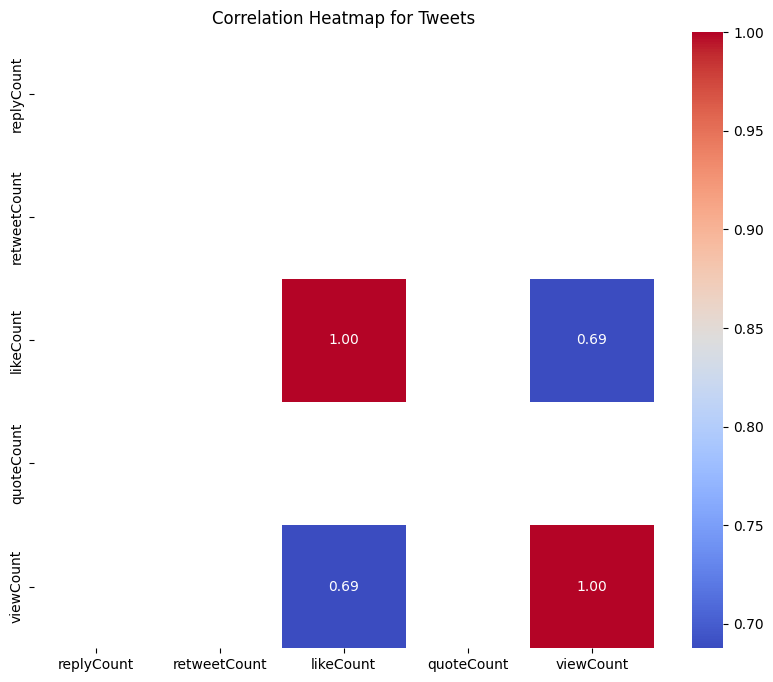

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove 'id' column from numerical_cols
numerical_cols = [col for col in numerical_cols if col != 'id']

# Calculate the correlation matrix
correlation_matrix = twtdata[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Tweets")
plt.show()


In [60]:
# Remove columns from categorical_cols
categorical_cols = [col for col in categorical_cols if col not in ['url', 'date', 'user', 'quotedTweet', 'hashtags', 'renderedContent', 'RefinedContent', 'lemmatized_tokens', 'tfidf_matrix','SentimentValue']]
# Print the remaining categorical columns
print(categorical_cols)
# Perform one-hot encoding
encoded_df = pd.get_dummies(twtdata, columns=categorical_cols)
print(encoded_df.columns)
encoded_df.to_csv("TwtOHEncoded.csv")

['lang', 'sourceLabel']
Index(['url', 'date', 'id', 'user', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'quotedTweet', 'hashtags', 'viewCount', 'renderedContent',
       'RefinedContent', 'lemmatized_tokens', 'tfidf_matrix', 'SentimentValue',
       'lang_en', 'sourceLabel_Blog2Tweet Automation', 'sourceLabel_Buffer',
       'sourceLabel_EFLFootballNews', 'sourceLabel_EnglandNationalTeamNews',
       'sourceLabel_EveryoneSocial', 'sourceLabel_F1reader',
       'sourceLabel_FS-Poster-App', 'sourceLabel_IFTTT',
       'sourceLabel_MotorsportWeek', 'sourceLabel_OverheardThePit',
       'sourceLabel_Powered by Sprinklr', 'sourceLabel_Radio King LiveTweet',
       'sourceLabel_Revive Social App', 'sourceLabel_SocialBee',
       'sourceLabel_Sprout Social', 'sourceLabel_TweetDeck',
       'sourceLabel_TweetDeck Web App', 'sourceLabel_Twitter Ads',
       'sourceLabel_Twitter Web App', 'sourceLabel_Twitter for Android',
       'sourceLabel_Twitter for iPad', 'sourceLabel_T

In [63]:
#only taking numericals columns after we OH encoded
numcols = [col for col in encoded_df.columns if col not in ['id','url', 'date', 'user', 'quotedTweet', 'hashtags', 'renderedContent', 'RefinedContent', 'lemmatized_tokens', 'tfidf_matrix','SentimentValue']]
print(numcols)

['replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'viewCount', 'lang_en', 'sourceLabel_Blog2Tweet Automation', 'sourceLabel_Buffer', 'sourceLabel_EFLFootballNews', 'sourceLabel_EnglandNationalTeamNews', 'sourceLabel_EveryoneSocial', 'sourceLabel_F1reader', 'sourceLabel_FS-Poster-App', 'sourceLabel_IFTTT', 'sourceLabel_MotorsportWeek', 'sourceLabel_OverheardThePit', 'sourceLabel_Powered by Sprinklr', 'sourceLabel_Radio King LiveTweet', 'sourceLabel_Revive Social App', 'sourceLabel_SocialBee', 'sourceLabel_Sprout Social', 'sourceLabel_TweetDeck', 'sourceLabel_TweetDeck Web App', 'sourceLabel_Twitter Ads', 'sourceLabel_Twitter Web App', 'sourceLabel_Twitter for Android', 'sourceLabel_Twitter for iPad', 'sourceLabel_Twitter for iPhone', 'sourceLabel_Zapier.com', 'sourceLabel_dlvr.it']


Data normalization starts here

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame to store normalized values
normalized_df = encoded_df.copy()

# Perform normalization on the numcols
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
normalized_values = scaler.fit_transform(encoded_df[numcols])

# Update the normalized values in the normalized_df DataFrame
normalized_df[numcols] = normalized_values
normalized_df.to_csv("TwtNormalized.csv")

Dimensionality reduction starts here using PCA (Pricipal Component Analysis)

In [66]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

ncolstake = numcols.copy()  # Make a copy to avoid modifying the original list
cols_to_remove = ['SentimentValue_Negative', 'SentimentValue_Neutral', 'SentimentValue_Positive']
# Remove columns from ncolstake using a list comprehension
ncolstake = [col for col in ncolstake if col not in cols_to_remove]
print(ncolstake)


# Fit PCA on the normalized data
pca.fit(normalized_df[ncolstake])

# Calculate cumulative explained variance ratio
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Determine the number of components needed for a desired explained variance threshold
desired_explained_variance = 0.87  #desired threshold [high info retention-[0.95 or above], balanced-[0.85-0.90], aggresive DR-[0.70-0.80]]
n_components = next(i for i, ratio in enumerate(explained_variance_ratio_cumulative, start=1) if ratio >= desired_explained_variance)

print(f"Number of components needed for {desired_explained_variance:.0%} explained variance: {n_components}")

['replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'viewCount', 'lang_en', 'sourceLabel_Blog2Tweet Automation', 'sourceLabel_Buffer', 'sourceLabel_EFLFootballNews', 'sourceLabel_EnglandNationalTeamNews', 'sourceLabel_EveryoneSocial', 'sourceLabel_F1reader', 'sourceLabel_FS-Poster-App', 'sourceLabel_IFTTT', 'sourceLabel_MotorsportWeek', 'sourceLabel_OverheardThePit', 'sourceLabel_Powered by Sprinklr', 'sourceLabel_Radio King LiveTweet', 'sourceLabel_Revive Social App', 'sourceLabel_SocialBee', 'sourceLabel_Sprout Social', 'sourceLabel_TweetDeck', 'sourceLabel_TweetDeck Web App', 'sourceLabel_Twitter Ads', 'sourceLabel_Twitter Web App', 'sourceLabel_Twitter for Android', 'sourceLabel_Twitter for iPad', 'sourceLabel_Twitter for iPhone', 'sourceLabel_Zapier.com', 'sourceLabel_dlvr.it']
Number of components needed for 87% explained variance: 9


so we will take 8 as n_components

In [67]:
# Corrected variable name
n_comps = 8  # Set the number of components you want
pca = PCA(n_components=n_comps)

# Fit and transform the normalized data using PCA
pca_result = pca.fit_transform(normalized_df[ncolstake])

# Create a DataFrame to store PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_comps)])  # Use n_comps here

catcols= [col for col in normalized_df.columns if col not in ncolstake]

# Concatenate PCA results with categorical columns from normalized_df
final_pca_df = pd.concat([normalized_df[catcols], pca_df], axis=1)

# Now final_pca_df contains the PCA results along with categorical columns
final_pca_df.to_csv("TwtFinalPCA.csv")

In [72]:
#seperating Features and target variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Columns to exclude from features (X)
columns_to_exclude = ['SentimentValue','RefinedContent', 'date','hashtags','lemmatized_tokens', 'renderedContent','replyCount', 'url','user','tfidf_matrix','quotedTweet']
target_variable = ['SentimentValue']
X = final_pca_df.loc[:, final_pca_df.columns.difference(columns_to_exclude)]
Y = final_pca_df[target_variable]

# Label encoding for categorical target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("\nTrain data shape:", X_train.shape, y_train.shape)
print("\nTest data shape:", X_test.shape, y_test.shape)


Train data shape: (248, 9) (248,)

Test data shape: (62, 9) (62,)


i:\PythonInstallation\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC  # For Support Vector Machine Classifier

# Initialize and train the SVM classifier
print("\nSVM Classification")
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

# Calculate accuracy and classification report
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nTrain Accuracy:", train_accuracy)
print("\nTest Accuracy:", test_accuracy)

# Print classification report for detailed metrics
class_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))



SVM Classification
